<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

# Librerías

Cargando las bibliotecas que necesitamos 


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1:  Datos de la estación meteorologica de Progreso, Yucatán

Fuente:  https://smn.conagua.gob.mx/es/observando-el-tiempo/estaciones-meteorologicas-automaticas-ema-s

In [100]:
df= pd.read_csv("datos/Estacion_PROGRESO_90_dias_19Nov.csv")
df.head(5)

,FechaLocal,FechaUTC,TemperaturaAire(C),Precipitacion(mm),HumedadRelativa(%),PresionAtmosferica(hpa),RadiacionSolar(W/m2),DireccionViento(grados),RapidezViento(km/h),DireccionRafaga(grados),RapidezRafaga(km/h)
0,19/11/2020 15:20,19/11/2020 21:20,28,0,72,1017.0,226.0,59.0,28.0,115.0,46.0
1,19/11/2020 15:10,19/11/2020 21:10,28,0,73,1017.0,445.0,59.0,27.0,103.0,43.0
2,19/11/2020 15:00,19/11/2020 21:00,28,0,74,1017.0,475.0,60.0,28.0,97.0,53.0
3,19/11/2020 14:50,19/11/2020 20:50,28,0,75,1017.0,359.0,59.0,27.0,94.0,51.0
4,19/11/2020 14:40,19/11/2020 20:40,28,0,74,1017.0,550.0,63.0,27.0,99.0,48.0


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Configurar la columna de 'FechaLocal' como índice temporal  </li>
</ul>
</div>

In [101]:
df['FechaLocal'] = pd.to_datetime(df['FechaLocal'], format= '%d/%m/%Y %H:%M')

In [102]:
df = df.set_index('FechaLocal')

In [103]:
df.head()

,FechaUTC,TemperaturaAire(C),Precipitacion(mm),HumedadRelativa(%),PresionAtmosferica(hpa),RadiacionSolar(W/m2),DireccionViento(grados),RapidezViento(km/h),DireccionRafaga(grados),RapidezRafaga(km/h)
FechaLocal,,,,,,,,,,
2020-11-19 15:20:00,19/11/2020 21:20,28,0,72,1017.0,226.0,59.0,28.0,115.0,46.0
2020-11-19 15:10:00,19/11/2020 21:10,28,0,73,1017.0,445.0,59.0,27.0,103.0,43.0
2020-11-19 15:00:00,19/11/2020 21:00,28,0,74,1017.0,475.0,60.0,28.0,97.0,53.0
2020-11-19 14:50:00,19/11/2020 20:50,28,0,75,1017.0,359.0,59.0,27.0,94.0,51.0
2020-11-19 14:40:00,19/11/2020 20:40,28,0,74,1017.0,550.0,63.0,27.0,99.0,48.0


<div class="alert alert-success">
    
a). Graficar la Precipitación total por día, semana y mes (graficas separadas)
    
</div> 

<AxesSubplot:xlabel='FechaLocal'>

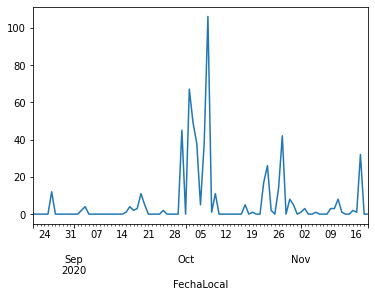

In [104]:
daily = df['Precipitacion(mm)'].resample('D').sum()
daily.plot()


<AxesSubplot:xlabel='FechaLocal'>

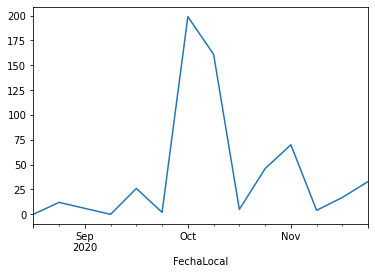

In [105]:
weekly = df['Precipitacion(mm)'].resample('W').sum()
weekly.plot()

<AxesSubplot:xlabel='FechaLocal'>

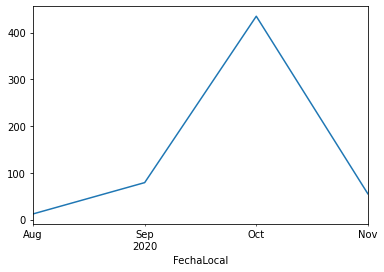

In [106]:
monthly = df['Precipitacion(mm)'].resample('M').sum()
monthly.plot()

<div class="alert alert-success">
    
b). En una misma grafica muestre la media, el valor mínimo y el máximo de la temperatura del aire
    
</div> 

In [107]:
air_temp = df['TemperaturaAire(C)'].resample('M')

<AxesSubplot:xlabel='FechaLocal'>

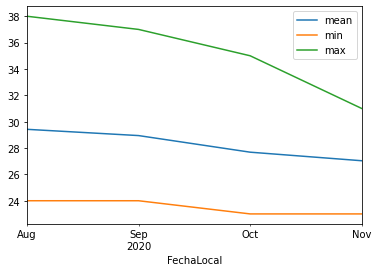

In [108]:
air_temp.agg(['mean','min', 'max']).plot()

<div class="alert alert-success">
    
c). Encontrar el día que en suma recibió mayor radiación solar; con este día haga una grafica con el parámetro de la mediana para cada 30 minutos.
    
</div> 

In [116]:
R_day = df['RadiacionSolar(W/m2)'].resample('D').sum().sort_values(ascending = False)
R_day

FechaLocal
2020-08-22    44854.0
2020-08-24    44086.0
2020-09-08    42821.0
2020-09-05    42790.0
2020-09-07    42753.0
               ...   
2020-08-21     9107.0
2020-10-30     7630.0
2020-10-27     6603.0
2020-09-30     6147.0
2020-10-07     1180.0
Name: RadiacionSolar(W/m2), Length: 91, dtype: float64

<AxesSubplot:xlabel='FechaLocal'>

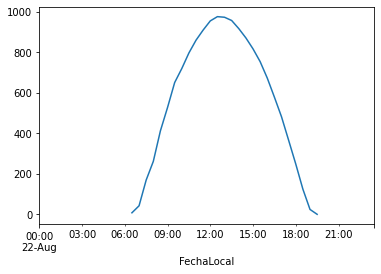

In [117]:
MaxRadDay = df.loc['2020-08-22']['RadiacionSolar(W/m2)']
MaxRadDay.resample('30T').median().plot()

# Ejercicio 2: Incendios en México

In [118]:
df= pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv")
df.head()

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
0,922,17-15-0922,19,26,45.7,98,46,23.0,99,México,...,Mayor a 100 Hectáreas,00:00:00,00:00:00,00:00:00,0.0,118726.00,39095.73,70852.06,1398996.49,Centro
1,33,17-23-0033,21,12,21.8,86,59,57.3,5,Quintana Roo,...,21 a 50 Hectáreas,36:00:00,00:30:00,00:00:00,0.0,55493.82,768.50,1457.05,22208.31,Sureste
2,298,17-07-0298,16,25,53.1,93,56,38.5,17,Chiapas,...,Mayor a 100 Hectáreas,00:30:00,00:30:00,00:00:00,0.0,49565.00,1981.46,6920.70,105485.34,Sureste
3,36,17-23-0036,19,14,47.3,88,19,24.5,2,Quintana Roo,...,51 a 100 Hectáreas,01:00:00,10:45:00,00:00:00,0.0,47800.52,1084.77,0.00,0.00,Sureste
4,160,17-20-0160,16,36,4.0,97,44,6.0,377,Oaxaca,...,Mayor a 100 Hectáreas,02:00:00,07:00:00,00:00:00,0.0,42600.00,7697.21,18070.85,275435.96,Centro


<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Configurar la columna de 'Fecha Inicio' como índice temporal desde el inicio de su lectura </li>
</ul>
</div>

In [124]:
#  'Fecha Inicio' tiene índice 13
df = pd.read_csv("datos/Serie_historica_anual_incendios_2017.csv", index_col=13, parse_dates=True)
df.head()

,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2017-01-04,922,17-15-0922,19,26,45.7,98,46,23.0,99,México,...,Mayor a 100 Hectáreas,00:00:00,00:00:00,00:00:00,0.0,118726.00,39095.73,70852.06,1398996.49,Centro
2017-04-15,33,17-23-0033,21,12,21.8,86,59,57.3,5,Quintana Roo,...,21 a 50 Hectáreas,36:00:00,00:30:00,00:00:00,0.0,55493.82,768.50,1457.05,22208.31,Sureste
2017-04-29,298,17-07-0298,16,25,53.1,93,56,38.5,17,Chiapas,...,Mayor a 100 Hectáreas,00:30:00,00:30:00,00:00:00,0.0,49565.00,1981.46,6920.70,105485.34,Sureste
2017-04-17,36,17-23-0036,19,14,47.3,88,19,24.5,2,Quintana Roo,...,51 a 100 Hectáreas,01:00:00,10:45:00,00:00:00,0.0,47800.52,1084.77,0.00,0.00,Sureste
2017-01-04,160,17-20-0160,16,36,4.0,97,44,6.0,377,Oaxaca,...,Mayor a 100 Hectáreas,02:00:00,07:00:00,00:00:00,0.0,42600.00,7697.21,18070.85,275435.96,Centro


Para poder realizar la segmentación(slicing) de días, semanas o meses será necesario ordenar los índices por fecha.

In [125]:
df = df.sort_index()
df.tail()


,Número de Incendio,Clave del incendio,Grados,Minutos,Segundos,Grados.1,Minutos.1,Segundos.1,Clave municipio,Estado,...,Tamaño,Deteccion,Llegada,Duracion HMS,Duracion H,Costos MXN,Superficie Salvada,CO2 emitido,CO2 Evito emitir,Region
Fecha Inicio,,,,,,,,,,,,,,,,,,,,,
2017-12-30,519,17-21-0519,19,6,16.5,97,15,11.8,179,Puebla,...,0 a 5 Hectáreas,00:15:00,02:00:00,10:00:00,10.00,7800.00,76.21,266.18,4057.13,Centro
2017-12-30,237,17-30-0237,19,5,52.0,97,15,19.4,29,Veracruz,...,21 a 50 Hectáreas,00:30:00,04:30:00,08:00:00,8.00,5803.00,640.16,2235.92,34079.88,Centro
2017-12-30,373,17-29-0373,19,12,12.9,98,4,59.9,28,Tlaxcala,...,0 a 5 Hectáreas,00:05:00,00:50:00,03:05:00,3.08,2064.96,26.67,93.16,1419.99,Centro
2017-12-30,372,17-29-0372,19,17,11.3,98,3,47.6,10,Tlaxcala,...,6 a 10 Hectáreas,00:15:00,00:30:00,06:15:00,6.25,3033.40,91.45,319.42,4868.55,Centro
2017-12-31,238,17-30-0238,19,32,16.8,97,13,53.8,128,Veracruz,...,0 a 5 Hectáreas,00:05:00,00:20:00,04:45:00,4.75,4698.00,11.43,39.93,608.57,Centro


<div class="alert alert-success">
    
d). Graficar la superficie Total de hectáreas afectadas en todo el país por día
    
</div> 

<AxesSubplot:xlabel='Fecha Inicio'>

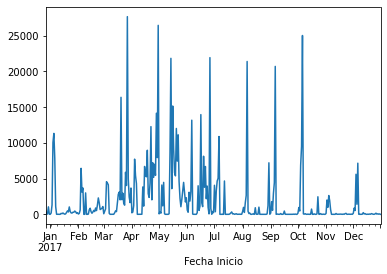

In [129]:
daily = df['Total Hectareas'].resample('D').sum()
daily.plot()

<div class="alert alert-success">
    
e). Graficar la superficie total de hectáreas afectadas sólo en Yucatán por mes
    
</div> 

<AxesSubplot:xlabel='Fecha Inicio'>

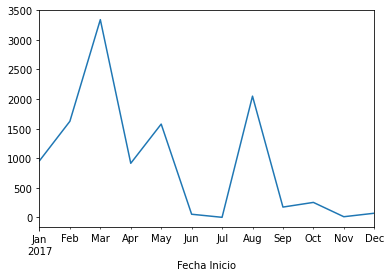

In [134]:
df_yucatan = df[df['Estado'] == 'Yucatán']
MonthlyYuc = df_yucatan['Total Hectareas'].resample('M').sum()
MonthlyYuc.plot()

<div class="alert alert-success">
    
f). Graficar la superficie total de hectáreas afectadas por semana sólo en Jalisco para los meses abril, mayo, junio y julio 
    
</div> 

<AxesSubplot:xlabel='Fecha Inicio'>

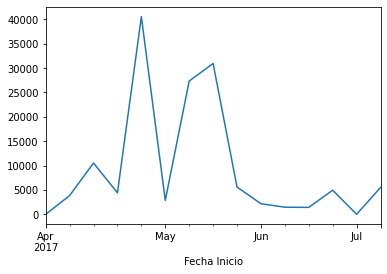

In [139]:
df_Jalisco = df[df['Estado'] == 'Jalisco']
subjalisco= df_Jalisco[df_Jalisco.index.month.isin([4, 5, 6,7])]  
subjalisco['Total Hectareas'].resample('W').sum().plot()

# Ejercicio 3: Pacientes confirmados con Covid en México


Fuente: https://datos.covid-19.conacyt.mx/#DownZCSV

<div class="alert alert-info">

<b>EJERCICIO</b>:

 <ul>
  <li> Para el análisis por fechas   </li>
</ul>
</div>

Como veremos a continuacón los datos de fecha se encuentran en las columnas, por lo que será necesario invertir su posición

In [140]:
df= pd.read_csv("datos/Casos_Diarios_Estado_Nacional_Confirmados_20201118.csv")
df.head()

,cve_ent,poblacion,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020,15-11-2020,16-11-2020,17-11-2020,18-11-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,55,29,15,4,0,0,0,0,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,111,69,64,45,28,13,6,6,8,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,66,62,53,62,43,25,12,23,6,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,8,5,6,6,13,0,0,2,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,7,10,10,7,1,2,0,2,0,0


Conservaremos solo el nombre de la entidad y las columnas de las fechas

In [141]:
df=df.loc[:,'nombre':]
df.head()

,nombre,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,...,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020,15-11-2020,16-11-2020,17-11-2020,18-11-2020
0,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,...,55,29,15,4,0,0,0,0,0,0
1,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,...,111,69,64,45,28,13,6,6,8,0
2,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,0,0,...,66,62,53,62,43,25,12,23,6,0
3,CAMPECHE,0,0,0,0,0,0,0,0,0,...,8,5,6,6,13,0,0,2,0,0
4,CHIAPAS,0,0,0,0,0,0,0,0,0,...,7,10,10,7,1,2,0,2,0,0


Llevamos a cabo la operacion Transpuesta, es decir intercambiar filas por columnas

In [142]:
df = df.set_index('nombre').T
df.head()

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
12-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16-01-2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


El resto es ajustar el nombre de nuestra columna que será el indice y configurarla con pd.to_datetime 

In [143]:
df=df.reset_index()
df.head()

nombre,index,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
0,12-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
df = df.rename(columns = {'index': 'Fecha'})
df.head()

nombre,Fecha,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
0,12-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,14-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16-01-2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format= '%d-%m-%Y')

In [146]:
df = df.set_index('Fecha')

In [147]:
df

nombre,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,DISTRITO FEDERAL,COAHUILA,COLIMA,DURANGO,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Nacional
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-14,0,13,25,0,2,3,38,61,0,116,...,54,9,0,51,7,5,5,43,39,844
2020-11-15,0,6,12,0,0,1,24,29,4,30,...,14,2,0,28,4,1,4,22,6,365
2020-11-16,0,6,23,2,2,0,14,20,1,38,...,0,5,31,31,0,5,1,13,1,337


<div class="alert alert-success">
    
a). Graficar el total de pacientes confirmados nivel Nacional por semana, desde el 15 de enero hasta el 14 de noviembre
    
</div> 

<AxesSubplot:xlabel='Fecha'>

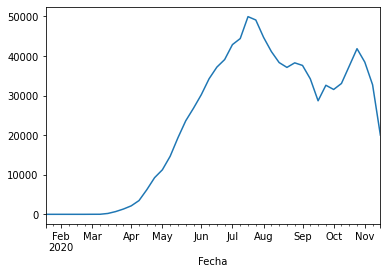

In [148]:
subset = df['2020-01-15':'2020-11-14']['Nacional']
subset.resample('W').sum().plot()


<div class="alert alert-success">
    
b). Graficar el total de pacientes confirmados cada 2 días en Yucatan (en todos los datos)
    
</div> 

<AxesSubplot:xlabel='Fecha'>

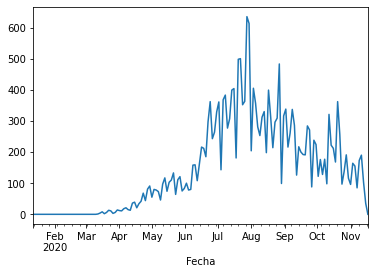

In [149]:
df['YUCATAN'].resample('2D').sum().plot()

<div class="alert alert-success">
    
c). Encontrar la semana con más pacientes confirmados en Yucatán
    
</div> 

In [163]:
weeks = df['YUCATAN'].resample('W').sum().sort_values(ascending = False)
weeks.iloc[[0]]

Fecha
2020-08-02    1723
Name: YUCATAN, dtype: int64

<div class="alert alert-success">
    
d). Encontrar la semana con más pacientes confirmados a nivel Nacional
    
</div>

In [165]:
weeksN = df['Nacional'].resample('W').sum().sort_values(ascending = False)
weeksN.iloc[[0]]

Fecha
2020-07-19    49963
Name: Nacional, dtype: int64